
<font color='grey' size= '5.5'>The Sparks Foundation </font>

<font color='blue' size= '5.5'>Name: Chandana Ramisetty</font>

<font color='blue' size= '5.5'>Task 1 : Prediction using Supervised Machine Learning </font>


<font color='green' size= '5'>Importing necessary libraries</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats


<font color='green' size= '5'>Step 1: Define the problem </font>

### In this Regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.This is a simple linear regression task as it involves just two variables.

<font color='green' size= '5'>Step 2: Gather and Prepare data [ Data Cleaning and Preprocessing] </font>

#### Importing Data 

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

#### Dropping Null values

In [3]:
data.dropna()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


#### Counting Null values

In [4]:
data.isnull().sum()
#No null values present

Hours     0
Scores    0
dtype: int64

<font color='green' size= '5'>Step 3: Explore the data [ Summary of the data and Visualize it]</font>

In [5]:
print("Data Description:", data.describe())

Data Description:            Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


In [6]:
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


#### scatter plot to understand the relation between the variables and to visualize the data

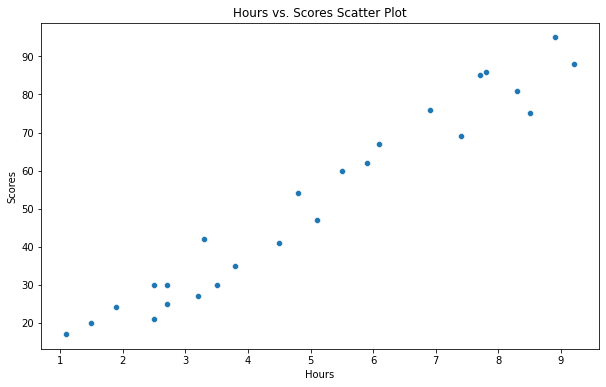

In [8]:
plt.figure(figsize=(10, 6)) #height = 6 inches, width = 8 inches
sns.scatterplot(x='Hours', y='Scores', data=data)
plt.title('Hours vs. Scores Scatter Plot')
plt.show()

#### Heatmap to understand the correlation between the variables, The columns are positively correlated as per the map

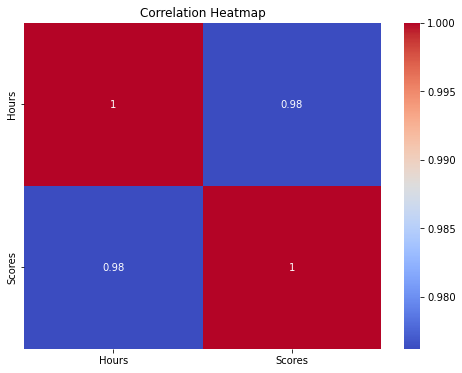

In [9]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(),annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#### Histogram to know the distribution and frequency of scores

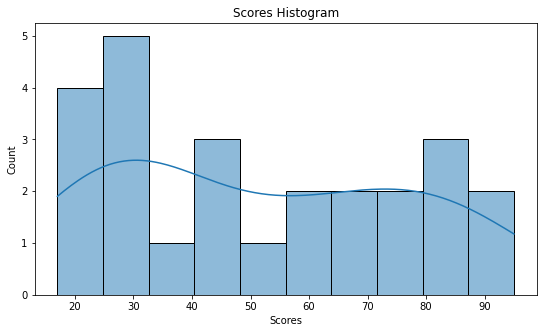

In [10]:
plt.figure(figsize=(9, 5))
sns.histplot(data['Scores'], bins=10, kde=True)
plt.title('Scores Histogram')
plt.show()

<font color='green' size= '5'>Step 4: Handling Outliers</font>

##### Z_scores to calculate standard deviation of the data points which are away from the Mean. It helps to identify very extreme or unusual values
#### The condition (z_scores < 3) selects only those rows where the z-score is less than 3. This threshold of 3 is commonly used as a cutoff to identify outliers.

In [11]:
z_scores = stats.zscore(data['Scores'])
print(z_scores)
data = data[(z_scores < 3)] 

0    -1.230223
1    -0.180820
2    -0.988053
3     0.949306
4    -0.866968
5    -1.270585
6     1.474008
7     0.343881
8     1.191476
9    -1.068777
10    1.352923
11    0.424605
12   -0.422990
13   -0.382629
14   -1.391670
15    1.756539
16   -0.866968
17   -1.109138
18    0.626413
19    0.707136
20   -0.866968
21    0.101711
22   -0.665160
23    0.989668
24    1.393284
Name: Scores, dtype: float64


#### Finding outliers using boxplot
#### Analysis: No outliers detected

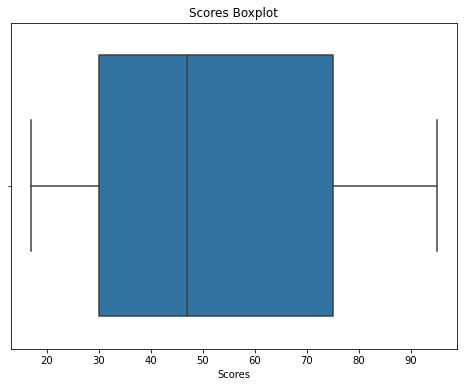

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data , x='Scores')
plt.title('Scores Boxplot')
plt.show()

<font color='green' size= '5'>Step 5: Prepare the data</font>

#### Creating feature and target variable

In [13]:
x = data.drop('Scores', axis = 1).values
y = data['Scores'].values

<font color='green' size= '5'>Step 6: Select a Model</font>

In [14]:
model = LinearRegression()

<font color='green' size= '5'>Step 7: Train the Model</font>

#### 20% of the data will be used for testing and 80% for training

In [15]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

LinearRegression()

<font color='green' size= '5'>Step 8: Evaluate the Model</font>

In [16]:
y_pred = model.predict(X_test)
print(y_pred)

[83.18814104 27.03208774 27.03208774 69.63323162 59.95115347]


#### Mean squared error (MSE) and coefficient of determination (R-squared) between y_test and y_pred. Comparing Predicted values and Actual values

In [17]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Model Accuracy or performance:",r2)

Mean Squared Error: 18.943211722315272
Model Accuracy or performance: 0.9678055545167994


<font color='green' size= '5'>Step 9: Validate and Test</font>

#### If three students have studied for 9.2, 5.2, 3.9 hours respectively, What would be their corresponding predicted scores?

In [18]:
new_hours = [[9.2], [5.2], [3.9]]  # Example test data
predicted_scores = model.predict(new_hours)
for hours, score in zip(new_hours, predicted_scores):
    print("Hours:", hours[0], "Predicted Score:", score)

Hours: 9.2 Predicted Score: 91.90201137489214
Hours: 5.2 Predicted Score: 53.17369875706936
Hours: 3.9 Predicted Score: 40.58699715627695
